In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def preprocess_sequence(sequence, target_length, padding_value=0):
    """
    Preprocesses the raw sequence data to have a fixed length.

    Args:
    - sequence (np.ndarray): The input sequence of shape (sequence_length, num_joints * 3)
    - target_length (int): The fixed length to which the sequence should be clipped or padded.
    - num_joints (int): The number of joints per frame in the sequence.
    - padding_value (float): The value used to pad shorter sequences.

    Returns:
    - np.ndarray: The preprocessed sequence of shape (target_length, num_joints * 3)
    """
    current_length, features = sequence.shape[:2]
    if current_length > target_length:
        # Clip the sequence if it's longer than the target length
        return sequence[:target_length]
    elif current_length < target_length:
        # Pad the sequence if it's shorter than the target length
        padding = np.full((target_length - current_length, features, 3), padding_value)
        return np.vstack([sequence, padding])
    return sequence

labels = ['keep', 'come', 'stop', 'ring']
labels_to_idx = {label: idx for idx, label in enumerate(labels)}
sequences = []
labels = []
target_length = 100

root = './datasets'
for file in os.listdir('datasets'):
    if 'motion' in file:
        motion = np.load(os.path.join(root, file))
        print(file, motion.shape)
        motion = preprocess_sequence(motion, target_length)
        sequences.append(motion)
        labels.append(labels_to_idx[file.split('_')[1]])

sequences = np.stack(sequences).reshape(-1, target_length, 63)
labels = np.array(labels)
print(sequences.shape, labels.shape)
np.savez('./datasets/motion_datasets.npz', sequences=sequences, labels=labels)

        # plt.plot(np.sum(motion, axis=1)[:, 1])
# motion = np.load('datasets/motion_come_04_18_2024_03_09_44.npy')
# print(motion.shape)
# plt.figure(figsize=(15,5))
# plt.plot(np.sum(motion, axis=1))

In [1]:
import os
import numpy as np
# import matplotlib.pyplot as plt

labels = ['keep', 'come', 'back', 'stop', 'ring']
labels_to_idx = {label: idx for idx, label in enumerate(labels)}
sequences = []
labels = []
target_length = 10

person = 'ymq'
root = f'../datasets/{person}'
indices = np.arange(2000)[::10]
for file in os.listdir(root):
    if 'motion' in file:
        motion = np.load(os.path.join(root, file))[:2000]
        # get slice every 10 frames
        for idx in indices:
            if motion[idx:idx+target_length].shape[0] != target_length:
                continue
            else:
                sequences.append(motion[idx:idx+target_length])
                labels.append(labels_to_idx[file.split('_')[1]])

sequences = np.stack(sequences).reshape(-1, target_length, 63)
labels = np.array(labels)
print(sequences.shape, labels.shape)
np.savez(f'../datasets/{person}/processed_data.npz', sequences=sequences, labels=labels)

(1000, 10, 63) (1000,)


motion_come_2024_04_18_03_12_10.npy (92, 21, 3)
motion_come_2024_04_18_03_13_04.npy (91, 21, 3)
motion_come_2024_04_18_03_13_20.npy (91, 21, 3)
motion_come_2024_04_18_03_12_26.npy (89, 21, 3)
motion_come_2024_04_18_03_12_43.npy (103, 21, 3)


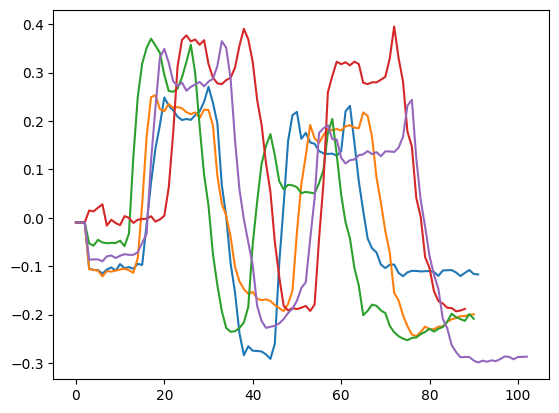

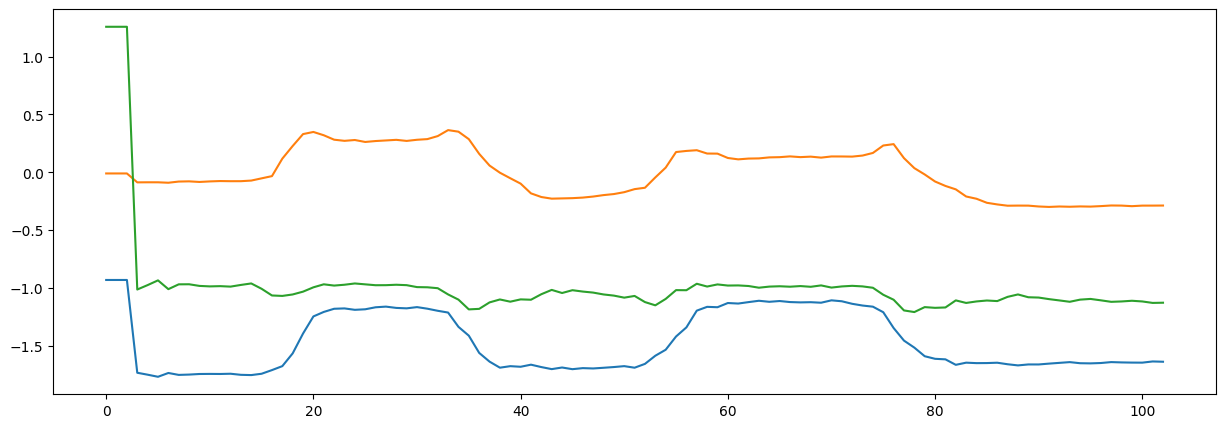

In [5]:
root = '../datasets'
for file in os.listdir('../datasets'):
    if 'motion' in file and 'come' in file:
        motion = np.load(os.path.join(root, file))
        print(file, motion.shape)
        plt.plot(np.sum(motion, axis=1)[:, 1])

# motion = np.load('datasets/motion_come_04_18_2024_03_09_44.npy')
# print(motion.shape)
plt.figure(figsize=(15,5))
plt.plot(np.sum(motion, axis=1))